# Factors Influencing Prosper Loan

## By: Mohammed Mahmud Katun

## Investigation Overview


> The focus of this investigation is to look at those factors that affect proper loans, the category of borrowers and the purpose for which they use the loan. Here, I will look at Employment status, Income Verifiable, Credit Score borrower APR, Term of repayment, loan application date, borrowers category (Occupation) and listing category.
 


## Dataset Overview

> This dataset (prosperLoanData) is a financial dataset for loan processing. 
It is related to the loan, borrowers, lenders, interest rate and other information required from borrowers. 
It contains 113,937 loans with 81 variables. 29,084 variables were removed from the analysis due to missing values
and non relevance to my focus.

In [29]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import datetime
from scipy import stats
import matplotlib.patches as mpatches


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [30]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [31]:
# The variables of the dataset are large. We will select only variables of interest
variable_interest = ['ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
                      'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
                     'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 
                     'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'StatedMonthlyIncome', 
                     'BorrowerState', 'DebtToIncomeRatio', 'IncomeVerifiable', 'InvestmentFromFriendsCount', 
                     'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment', 'PercentFunded', 
                      'InvestmentFromFriendsAmount', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']

In [32]:
# Create a new dataframe with variables of interest
loan_df = df[variable_interest]

In [33]:
# Select dataset with Ratings since it is the important factor investors used to fund loans
loan_df =loan_df[loan_df['ProsperRating (Alpha)'].notnull()]

In [34]:
# Fill missing occupations with 'Unspecified'
loan_df['Occupation']=loan_df['Occupation'].fillna('Unspecified')

In [35]:
# The missing values in 'DebtToIncomeRatio' will be replaced with the mean
loan_df['DebtToIncomeRatio']=loan_df['DebtToIncomeRatio'].fillna(loan_df['DebtToIncomeRatio'].mean())

In [36]:
# Convert 'ListingCreationDate' type from str to datetime and extract 'date', 'month' and 'year'
loan_df['ListingCreationDate']=pd.to_datetime(loan_df['ListingCreationDate'])
loan_df['date'] = loan_df['ListingCreationDate'].dt.date   # 'date' extracted from 'ListingCreationDate'
loan_df['month'] = loan_df['ListingCreationDate'].dt.month # 'month' extracted from 'ListingCreationDate'
loan_df['year']= loan_df['ListingCreationDate'].dt.year    # 'year' extracted from 'ListingCreationDate'

In [37]:
# Convert date to datetime
loan_df['date'] =pd.to_datetime(loan_df['date'])

In [38]:
# Drop 'ListingCreationDate' from the dataframe
loan_df.drop(['ListingCreationDate'], axis=1, inplace=True)

In [39]:
# Convert 'LoanOriginationDate' to 'datetime'
loan_df['LoanOriginationDate']=pd.to_datetime(loan_df['LoanOriginationDate'])

In [40]:
# Convert 'ProsperScore' to integer type
loan_df['ProsperScore']=loan_df['ProsperScore'].astype(int)

In [41]:
# Create 'Average_CreditScore' Column
loan_df['Average_CreditScore'] = (loan_df['CreditScoreRangeLower'] + loan_df['CreditScoreRangeUpper'])/2

In [42]:
# Use the Rating available on the data dictionary to create ProsperRating and convert it to ordinal category type
rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_rating = pd.api.types.CategoricalDtype(ordered = True, categories = rating)
loan_df['ProsperRating'] = loan_df['ProsperRating (Alpha)'].astype(ordered_rating)

In [43]:
# Use the Rating available on the data dictionary to create ListingCategory
cat_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
loan_df['ListingCategory (numeric)'].replace(cat_dict, inplace =True)
loan_df.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [44]:
# Convert 'Month' type  to str
loan_df['month']=loan_df['month'].astype(str)

In [45]:
# Replace the numerical values of month with names of month
loan_df['month'] =loan_df.month.replace({'1': 'Jan', '2': 'Feb', '3' : 'Mar', '4' : 'Apr', '5' : 'May', '6' : 'Jun', '7' : 'Jul', '8' : 'Aug', '9' : 'Sep', '10' : 'Oct', '11' : 'Nov', '12' : 'Dec'})

## Employment Status of Borrowers

> More than 70% of borrowers are employed and are Professionals. Only few are doing a part-time job. This could be the contributory factor to low number of students among borrowers.

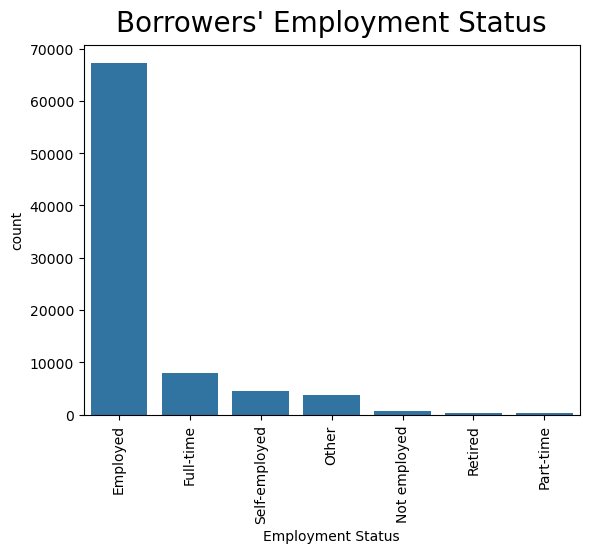

In [46]:
# Distribution of Employment Status
plt.rcdefaults()
base_color = sns.color_palette()[0]
plt.xticks(rotation=90);
rcParams['figure.figsize'] = 10,5
Employment_order = loan_df.EmploymentStatus.value_counts().index # Order the categorical variable 
sns.countplot(data=loan_df, x='EmploymentStatus', order=Employment_order, color=base_color);
plt.title("Borrowers' Employment Status", fontsize=20, y=1.015);
plt.xlabel('Employment Status');

## Income Verifiable

> More than 90% of borrowers' income is verifiable. This is a contributory factor why more than 95% of the loans are funded.

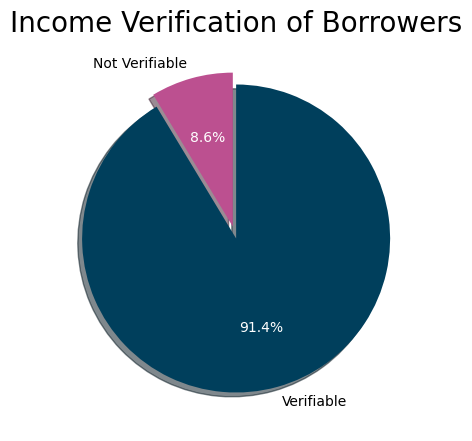

In [47]:
### Income Verification of Borrowers
plt.figure(figsize =(10, 5));
_, _, autotexts = plt.pie(loan_df['IncomeVerifiable'].value_counts(), labels = ['Verifiable', 'Not Verifiable'], 
        colors=['#003f5c', '#bc5090'], startangle = 90, counterclock = False, shadow = True, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
# Set plot title
plt.title(("Income Verification of Borrowers"), fontsize=20, y=1.015);
plt.rcParams['font.size'] = 10
# showing the plot
plt.show();

## Average Credit Score

> The Average Credit Score of borrowers are all above minimum Score of 600. This is also a contributory factor why more than 95% of the loans are funded.

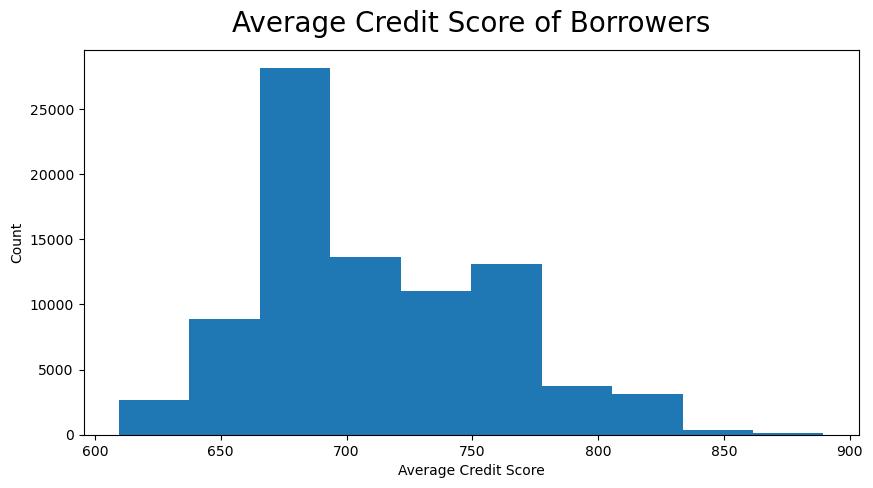

In [48]:
plt.hist(data = loan_df, x = 'Average_CreditScore')
plt.xlabel('Average Credit Score')
plt.ylabel('Count')
plt.title('Average Credit Score of Borrowers', fontsize=20, y=1.025);

## Borrower APR

> More than 80% of borrowers APR is above 14%. This also affects loan funding as APR of 14% and above is good for lenders.

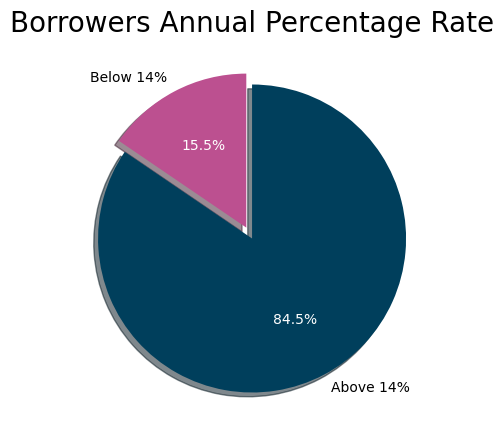

In [49]:
# We'll divide the data into two categories according to 'APR' value. Under and above 14%
rate_strength = loan_df.BorrowerAPR >= 0.14
# plot of pie chart
_, _, autotexts = plt.pie(rate_strength.value_counts(), labels = ['Above 14%', 'Below 14%'], 
        colors=['#003f5c', '#bc5090'], startangle = 90, counterclock = False, shadow = True, 
        explode = (0, 0.08), radius = 1.0, autopct = '%1.1f%%')
# Change autopct text color to be white
for ins in autotexts:
    ins.set_color('white')
# Set plot title
plt.title('Borrowers Annual Percentage Rate', fontsize=20, y=1.015)
plt.rcParams['font.size'] = 16
# showing the plot
plt.show();

## Loan Date

> There was low application in 2010; as this is the year US begins to recover from the Great Recession (2007 -2009) and most household are trying to payoff accumulated debts. However, there is appreciable increase in loan application from 2010 to 2013. There was a rapid increase in the number in 2014. This is due to the fact that the total number of jobs in this year returns to its level before recession in 2007.

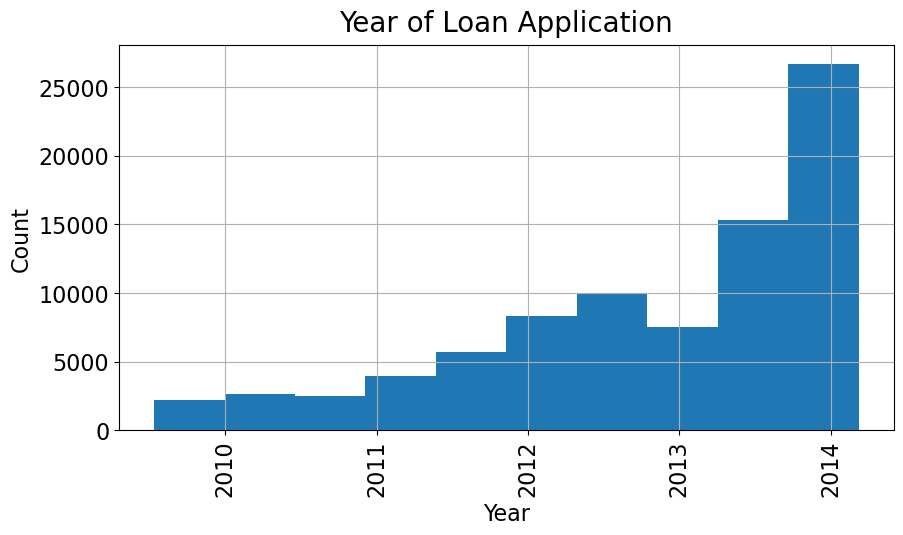

In [50]:
# Plot histogram for Date of loan Application
plt.xticks(rotation=90);
loan_df.date.hist(figsize=(10,5))
plt.title("Year of Loan Application", fontsize=20, y=1.015);
plt.xlabel('Year');
plt.ylabel('Count');

## Term of Repayment

> Over 60% of borrowers stated to repay their loan in 36 months (3 years) whereas very few stated 12 months (1 year). This is related to the actual amount requested. Large number of borrowers requested for \\$10,000 and stated to repay less than \\$500 monthly. This is about 10% of monthly income of those earning an average of \\$5,000 monthly (average monthly income of those earning between \\$50,000 and \\$75,000 annually).

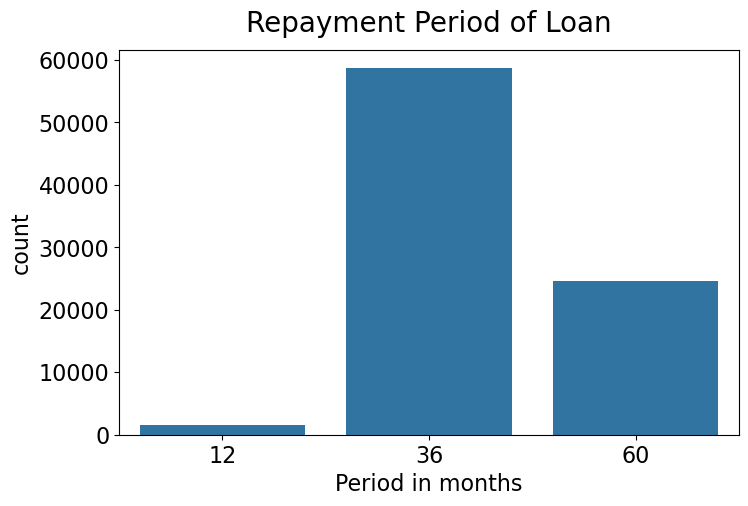

In [51]:
plt.figure(figsize=[8, 5])
sns.countplot(data=loan_df, x='Term', color=base_color)
plt.title('Repayment Period of Loan', fontsize=20, y=1.025);
plt.xlabel('Period in months');

## Borrowers Category (Occupation)

> Most borrowers are Professionals. Although, some did not specify their occupation and many are grouped under "others". None of the students' categories falls within the top 25 occupation. This is due to the fact that many of the students do not have a source of earning.

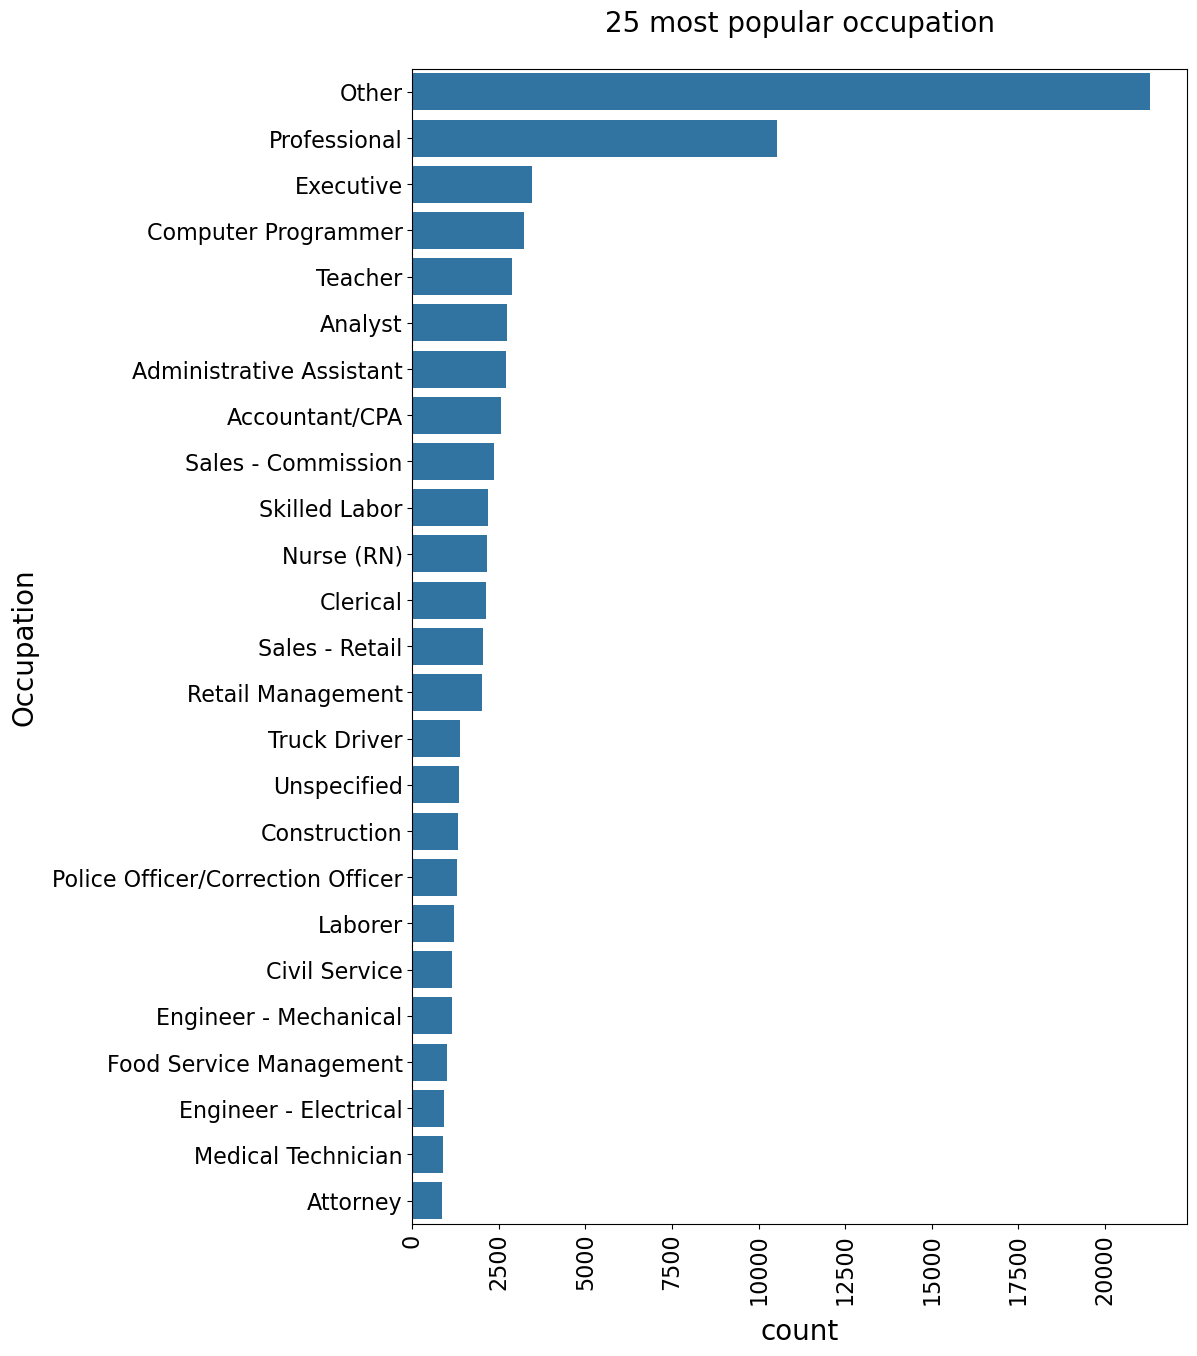

In [52]:
# 25 most popular occupations of borrowers
plt.figure(figsize =(10, 15));
popular_occupation = loan_df['Occupation'].value_counts()[:25]
sns.barplot(x=popular_occupation, y=popular_occupation.index, color=base_color)
plt.title('25 most popular occupation', fontsize=20, y=1.025)
plt.xlabel('count', labelpad=10, fontsize=20)
plt.ylabel('Occupation', labelpad=10, fontsize=20)
plt.xticks(rotation=90);

## Listing Category (Loan Purpose)

> More than 60% of the borrowers need the loan for debt consolidation. However, few of them need the loan for wedding, vacation, study, among others.

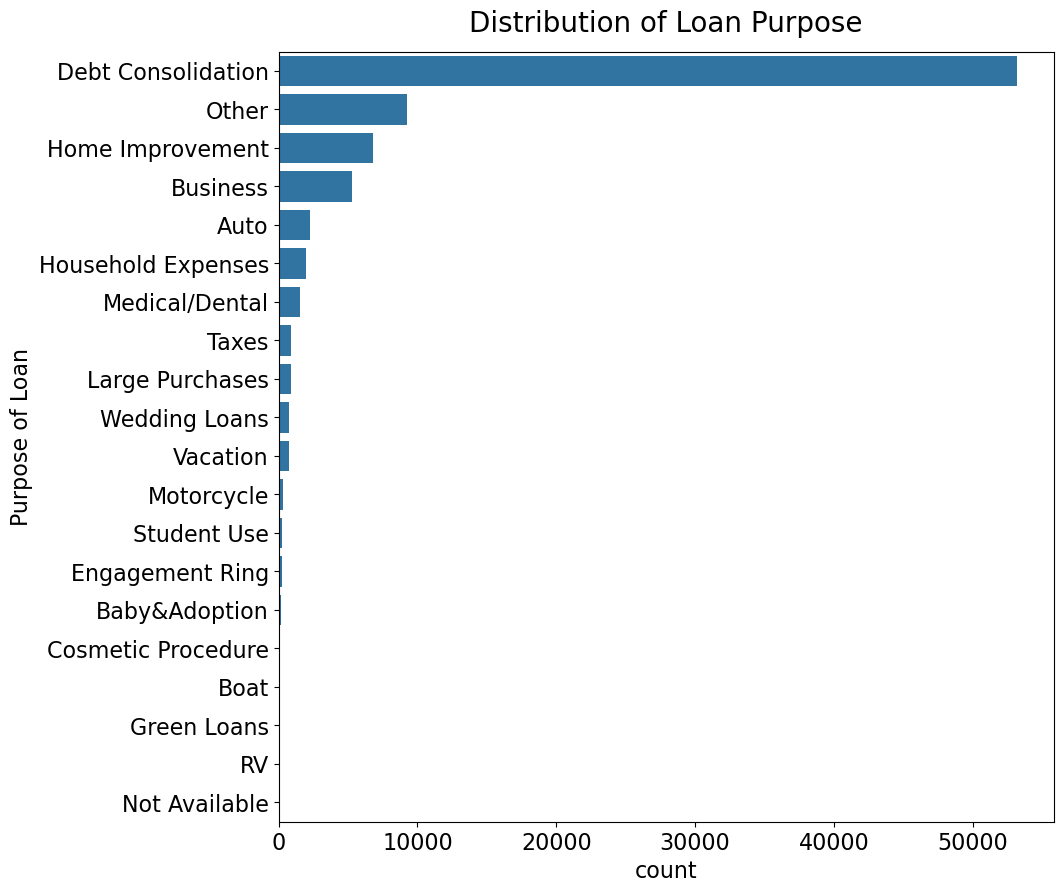

In [53]:
# Distribution of ListingCategory (Loan Purpose)
purpose_order = loan_df['ListingCategory'].value_counts().index
plt.figure(figsize=[10, 10]);
sns.countplot(data = loan_df, y = 'ListingCategory', color = base_color, order=purpose_order)
plt.ylabel('Purpose of Loan');
plt.title('Distribution of Loan Purpose', fontsize=20, y=1.015);

## Loan Amount vs. Year

> There is a positive correlation between loan amount and year. It is seen from the chart that there was low amount in 2009; as this is the year US begins to recover from the Great Recession (2007 -2009) and most household are trying to payoff accumulated debts. However, there is appreciable increase in loan application from 2010 to 2013. There was a rapid increase in the number in 2014.This is due to the fact that the total number of jobs in this year returns to its level before recession in 2007.

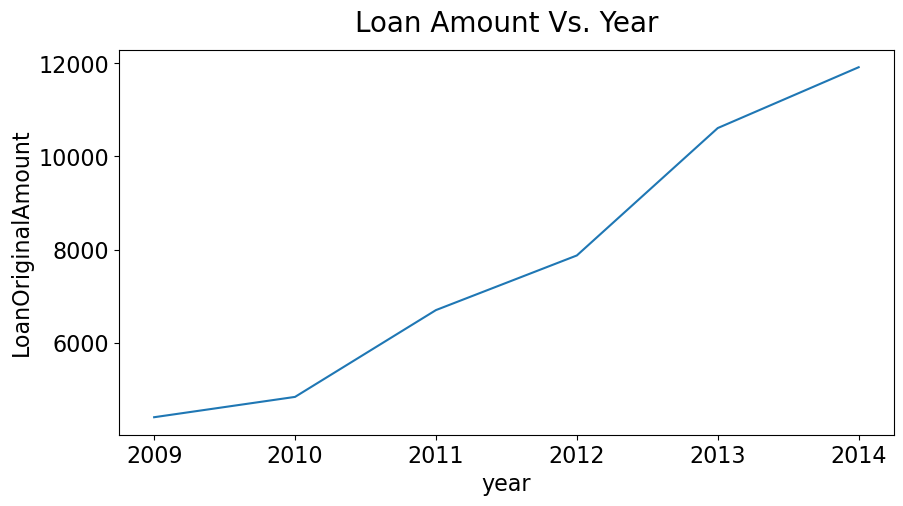

In [54]:
# plots the pointplot for loanOriginalAmount vs year
sns.lineplot(data=loan_df, x='year', y='LoanOriginalAmount', ci=None);
plt.title('Loan Amount Vs. Year', fontsize=20, y=1.025);

## Relation between Borrower Rate, Year and Ownership of House

> There is an increase and a fall in Borrower Rate for both home and non-home owners over the year with lowest being in 2014. Borrower rate for both home owners and non-home owners increased between 2009 to 2011, although higher for home owners. This rapidly decreased from 2011 to 2014, where it is lowest. It is therefore established that borrowers without home have higher interest rate and the rapid fall in the rate in 2014 is attributed to increment in number of jobs in US after the economic recession of 2007 -2009.

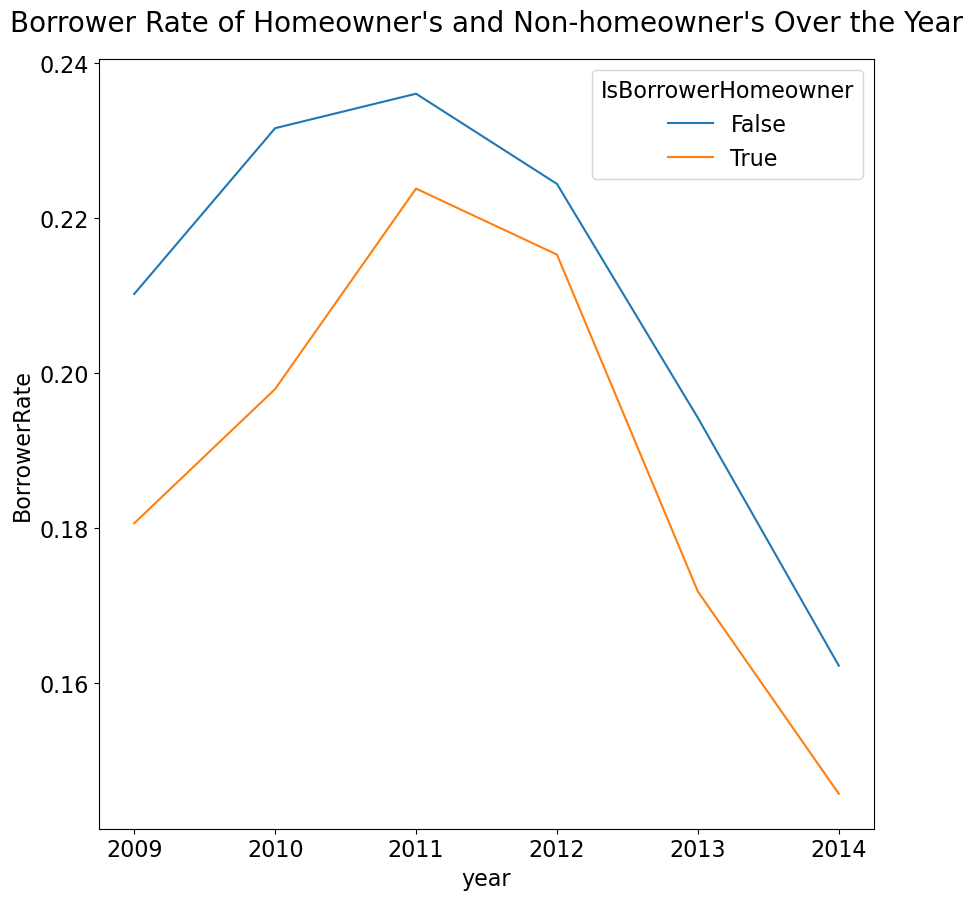

In [55]:
# plots the lineplot to analyze homeowner's and non-homeowner's rate over years
plt.figure(figsize=(10,10))
sns.lineplot(data =loan_df, x= 'year', y= 'BorrowerRate', hue='IsBorrowerHomeowner', ci=None);
plt.title("Borrower Rate of Homeowner's and Non-homeowner's Over the Year", fontsize=20, y=1.025);

In [56]:
!jupyter nbconvert Part_II_slide_deck_prosperLoanData.ipynb --to slides --post serve --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck_prosperLoanData.ipynb to slides
[NbConvertApp] Writing 1236771 bytes to Part_II_slide_deck_prosperLoanData.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\muazz\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\muazz\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\muazz\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\muazz\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\muazz\anaconda3\lib